<a href="https://colab.research.google.com/github/Krunal-375/GreenAIEdunet/blob/main/linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#Load the dataset
df = pd.read_csv('appliance_energy.csv')

#Display the first few rows
df.head()

,Temperature (°C),Energy Consumption (kWh)
0,22.490802,2.292604
1,34.014286,3.251925
2,29.639879,3.009868
3,26.973170,1.703533
4,18.120373,1.702201


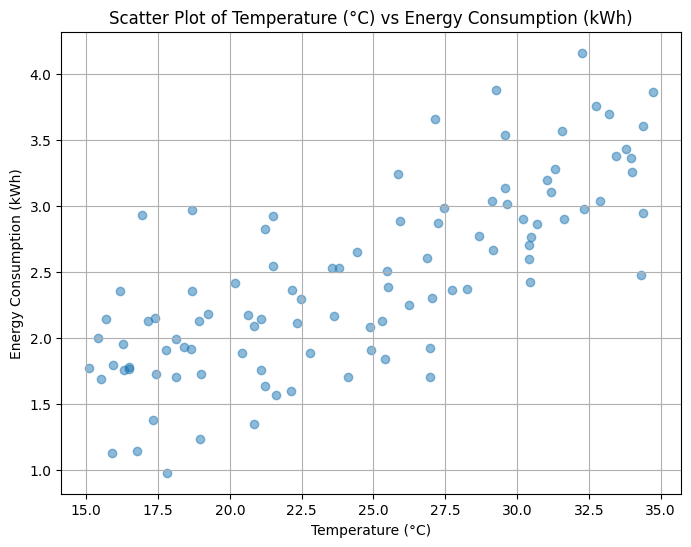

In [ ]:
#draw a scatterplot between this two

# Assuming 'df' is already loaded as in the previous code

# Select the columns for the scatter plot
x = df['Temperature (°C)']
y = df['Energy Consumption (kWh)']

# Create the scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(x, y, alpha=0.5) # alpha adds transparency to points
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Scatter Plot of Temperature (°C) vs Energy Consumption (kWh)')
plt.grid(True)  # Add a grid for better readability
plt.show()

In [ ]:
#describe the data
df.describe()

,Temperature (°C),Energy Consumption (kWh)
count,100.000000,100.000000
mean,24.403615,2.439821
std,5.949788,0.693527
min,15.110442,0.978107
25%,18.864015,1.908640
50%,24.282849,2.364121
75%,29.604062,2.931199
max,34.737739,4.159094


In [ ]:
# Check for null values
print(df.isnull().sum())

Temperature (°C)            0
Energy Consumption (kWh)    0
dtype: int64


In [ ]:
#split data into dependent and independent variables
X = df.drop('Energy Consumption (kWh)', axis=1)  # Features (independent variables)
y = df['Energy Consumption (kWh)']  # Target variable (dependent variable)

In [ ]:
# prompt: xtrain ytrain xtest ytest

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
xtrain.head()

,Temperature (°C)
55,33.437485
88,32.744255
26,18.993476
42,15.687770
69,34.737739


In [ ]:
ytrain.head()

,Energy Consumption (kWh)
55,3.378030
88,3.756114
26,1.727990
42,2.140188
69,3.864685


In [ ]:
xtest.head()

,Temperature (°C)
83,16.271167
53,32.896547
70,30.444895
45,28.250446
44,20.175600


In [ ]:
ytest.head()

,Energy Consumption (kWh)
83,1.955394
53,3.037917
70,2.426014
45,2.370351
44,2.413076


In [ ]:
#create a linear regression model

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [ ]:
print("Slope: ",model.coef_)
print("y_intercept: ",model.intercept_)

Slope:  [0.08996618]
y_intercept:  0.22196391661907633


In [ ]:
# Make predictions on the test set
ypred = model.predict(xtest)


In [ ]:
# Calculate the mean squared error
mse = mean_squared_error(ytest, ypred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.16342487842925055


In [ ]:

# Calculate the R-squared value
r2 = r2_score(ytest, ypred)
print(f"R-squared: {r2}")

R-squared: 0.6119478445218713


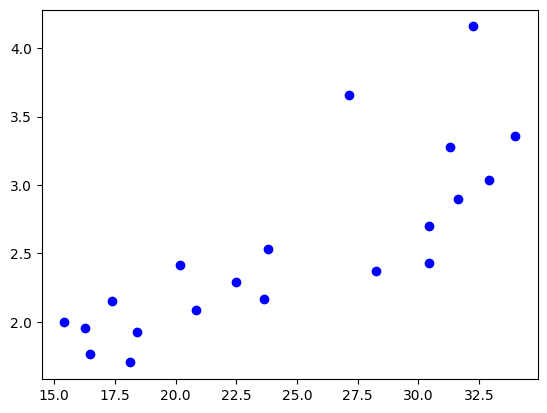

In [ ]:
# Create the scatter plot of the test data
plt.scatter(xtest,ytest,color='blue',label='Test Data') #Actual Data

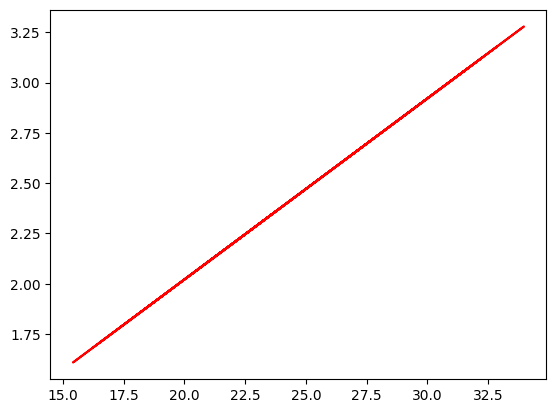

In [ ]:
plt.plot(xtest, ypred, color='red', label='Regression Line')  # Predicted data


Text(0.5, 0, 'Temperature (°C)')

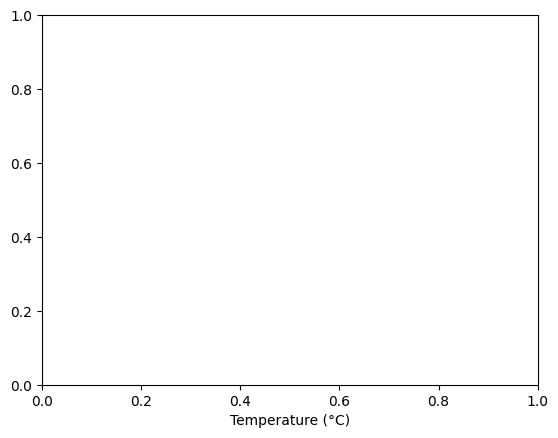

In [ ]:
plt.xlabel('Temperature (°C)')

Text(0, 0.5, 'Energy Consumption (kWh)')

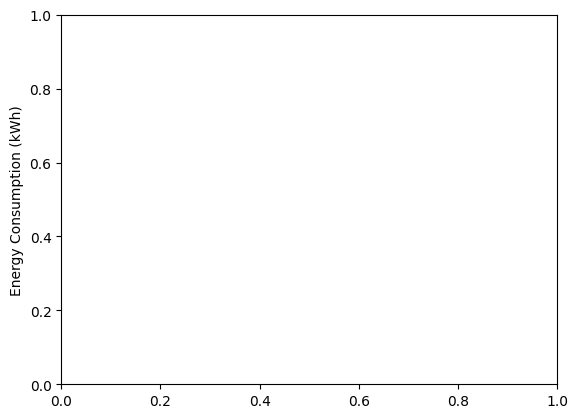

In [ ]:
plt.ylabel('Energy Consumption (kWh)')


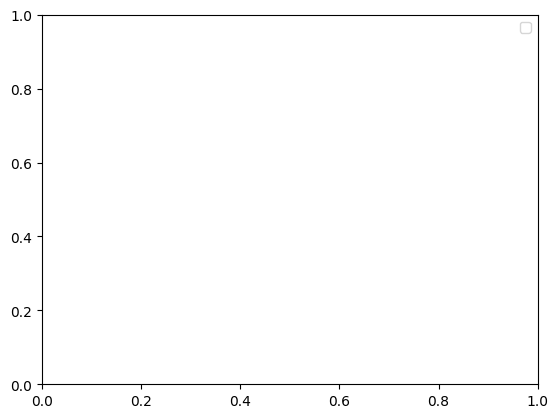

In [ ]:
plt.legend()


Text(0.5, 1.0, 'Energy Consumption Prediction using Simple Linear Regression')

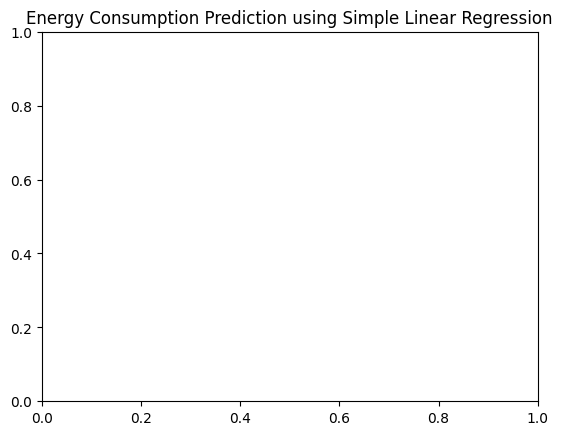

In [ ]:
plt.title('Energy Consumption Prediction using Simple Linear Regression')

In [ ]:
plt.show()

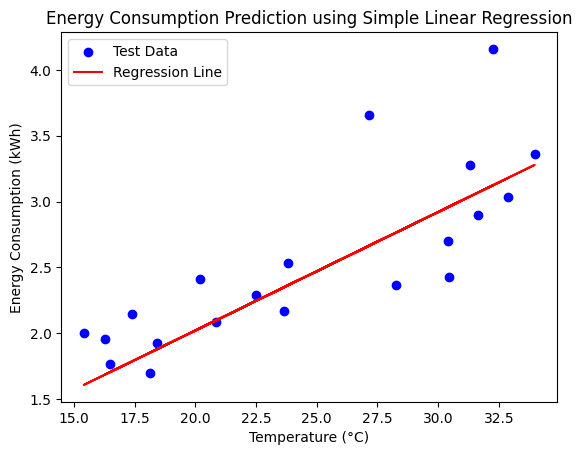

In [ ]:
# Plot the test data and regression line
plt.scatter(xtest, ytest, color='blue', label='Test Data')  # Actual data
plt.plot(xtest, ypred, color='red', label='Regression Line')  # Predicted data
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.title('Energy Consumption Prediction using Simple Linear Regression')
plt.show()

In [ ]:
import joblib
#save the model to a file
joblib.dump(model,'appliance_energy_model.pkl')

['appliance_energy_model.pkl']

In [ ]:
# Now deploy the model

import joblib

# Load the trained model
loaded_model = joblib.load('appliance_energy_model.pkl')

#Example Input
#Temperature (°C)
temp = np.array([[22]])

# Make a prediction
prediction = loaded_model.predict(temp)

# Print the prediction
print(f"Predicted energy consumption for the given temperature: {prediction} kWh")


Predicted energy consumption for the given temperature: [2.20121994] kWh


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
